In [1]:
# file operations
import os
# to list files
import glob
# for numerical analysis
import numpy as np 
# to store and process in a dataframe
import pandas as pd 
# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns
# image processing
import matplotlib.image as mpimg
# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report
# utility functions
from tensorflow.keras.utils import to_categorical, plot_model
# process image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# callback functions
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [2]:
# list of files in the dataset
os.listdir('C:/Users/Lenovo/Desktop/python_jp/Final project/cell_images/cell_images')

['Parasitized', 'Uninfected']

In [3]:
# list all the images in the directory Parasitized
parasitized = glob.glob('C:/Users/Lenovo/Desktop/python_jp/Final project/cell_images/cell_images/Parasitized/*.png')

# no. of files in the directory Parasitized
print('No. of files in the directory Parasitized', len(parasitized))

# first few images
parasitized[:5]

No. of files in the directory Parasitized 13779


['C:/Users/Lenovo/Desktop/python_jp/Final project/cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C:/Users/Lenovo/Desktop/python_jp/Final project/cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C:/Users/Lenovo/Desktop/python_jp/Final project/cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C:/Users/Lenovo/Desktop/python_jp/Final project/cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C:/Users/Lenovo/Desktop/python_jp/Final project/cell_images/cell_images/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_166.png']

In [4]:
# list all the images in the directory Uninfected
uninfected = glob.glob('C:/Users/Lenovo/Desktop/python_jp/Final project/cell_images/cell_images/Uninfected/*.png')

# no. of files in the directory Uninfected
print('No. of files in the directory Uninfected', len(uninfected))

# first few images
uninfected[:5]

No. of files in the directory Uninfected 13779


['C:/Users/Lenovo/Desktop/python_jp/Final project/cell_images/cell_images/Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png',
 'C:/Users/Lenovo/Desktop/python_jp/Final project/cell_images/cell_images/Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_131.png',
 'C:/Users/Lenovo/Desktop/python_jp/Final project/cell_images/cell_images/Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_144.png',
 'C:/Users/Lenovo/Desktop/python_jp/Final project/cell_images/cell_images/Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_21.png',
 'C:/Users/Lenovo/Desktop/python_jp/Final project/cell_images/cell_images/Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_25.png']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15892\3638847830.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 10, ind+1)


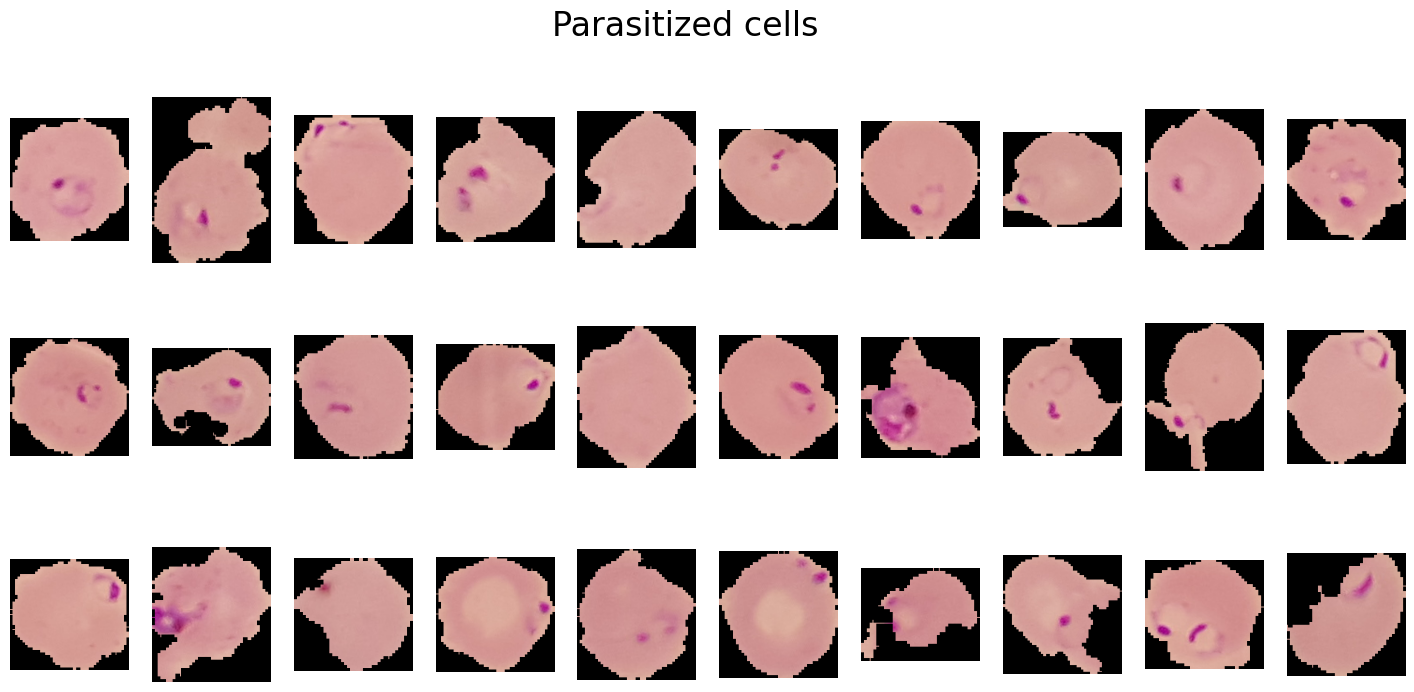

In [5]:
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Parasitized cells', fontsize=24)

for ind, img_src in enumerate(parasitized[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15892\3420207871.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 10, ind+1)


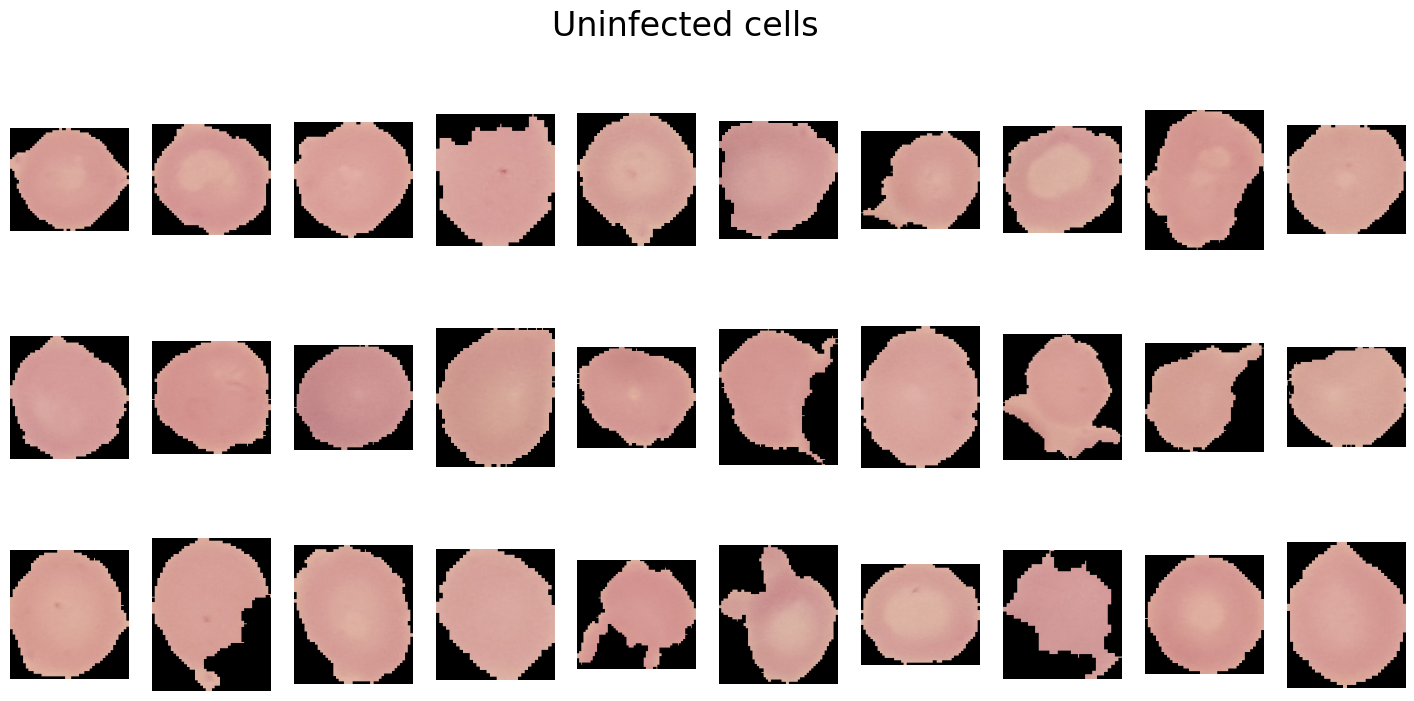

In [6]:
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Uninfected cells', fontsize=24)

for ind, img_src in enumerate(uninfected[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

In [7]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels
TARGET_SIZE = 64
EPOCHS = 10

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [9]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             validation_split=0.3)

train_data = datagen.flow_from_directory('C:/Users/Lenovo/Desktop/python_jp/Final project/cell_images/cell_images',
                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                         class_mode='binary',
                                         subset='training')

validation_data = datagen.flow_from_directory('C:/Users/Lenovo/Desktop/python_jp/Final project/cell_images/cell_images',
                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                              batch_size=BATCH_SIZE,
                                              shuffle=True,
                                              class_mode='binary',
                                              subset='validation')

Found 19292 images belonging to 2 classes.
Found 8266 images belonging to 2 classes.


In [10]:
# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               min_delta = 0.01,
                               patience=5)

# Instantiate a model checkpoint callback
model_save = ModelCheckpoint('best_model.hdf5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True)

In [11]:
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=EPOCHS,
                    verbose=1, 
                    callbacks=[early_stopping, model_save])

Epoch 1/10
193/193 [==============================] - 723s 4s/step - loss: 0.5748 - accuracy: 0.6979 - val_loss: 0.5084 - val_accuracy: 0.8905
Epoch 2/10
193/193 [==============================] - 318s 2s/step - loss: 0.3325 - accuracy: 0.8862 - val_loss: 0.2680 - val_accuracy: 0.9027
Epoch 3/10
193/193 [==============================] - 322s 2s/step - loss: 0.2480 - accuracy: 0.9120 - val_loss: 0.2430 - val_accuracy: 0.8980
Epoch 4/10
193/193 [==============================] - 319s 2s/step - loss: 0.2300 - accuracy: 0.9221 - val_loss: 0.2403 - val_accuracy: 0.9088
Epoch 5/10
193/193 [==============================] - 321s 2s/step - loss: 0.2132 - accuracy: 0.9290 - val_loss: 0.2055 - val_accuracy: 0.9227
Epoch 6/10
193/193 [==============================] - 322s 2s/step - loss: 0.2109 - accuracy: 0.9285 - val_loss: 0.2088 - val_accuracy: 0.9258
Epoch 7/10
193/193 [==============================] - 323s 2s/step - loss: 0.2033 - accuracy: 0.9316 - val_loss: 0.2010 - val_accuracy: 0.9295

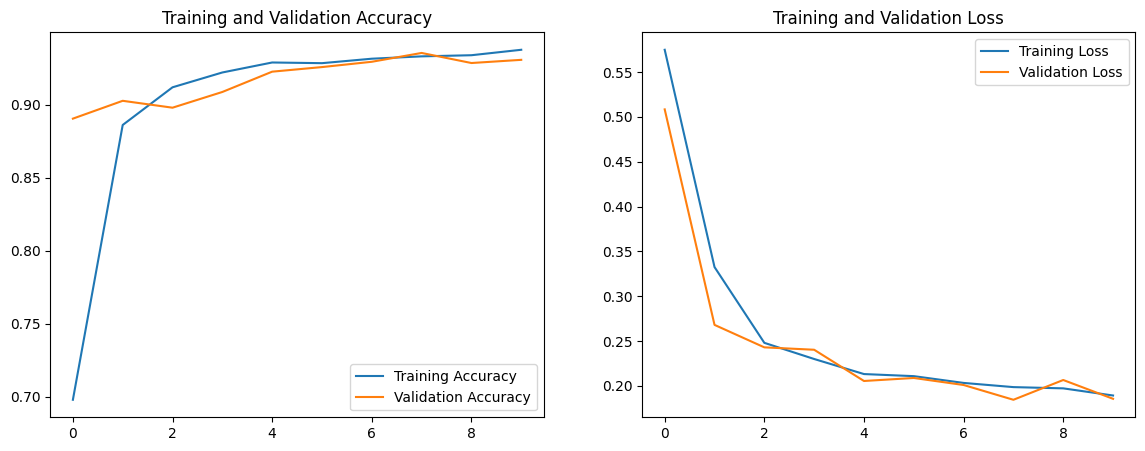

In [12]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()